# Vehicle Insurance EDA Mini Project

## 1. Introduction
### This project performs an exploratory data analysis on a vehicle insurance dataset to identify key factors that influence claim likelihood and behavior. It includes preprocessing, analysis of demographics and policy factors, and visual insights.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import zscore
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
df = pd.read_csv("C:/Users/Admin/Desktop/Vehicle Insurance/Vehicle_Insurance.csv")

In [5]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
print(df.shape)
df.info()
df.describe(include='all')

(381109, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


In [7]:
print("\nMissing Values in Each Column:\n")
print(df.isnull().sum())


Missing Values in Each Column:

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [8]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
z_scores = np.abs(zscore(df[num_cols].dropna()))
filtered_entries = (z_scores < 3).all(axis=1)
df_clean = df[num_cols].dropna()[filtered_entries]

print("\nOriginal rows:", df.shape[0])
print("Rows after removing outliers:", df_clean.shape[0])



Original rows: 381109
Rows after removing outliers: 378222


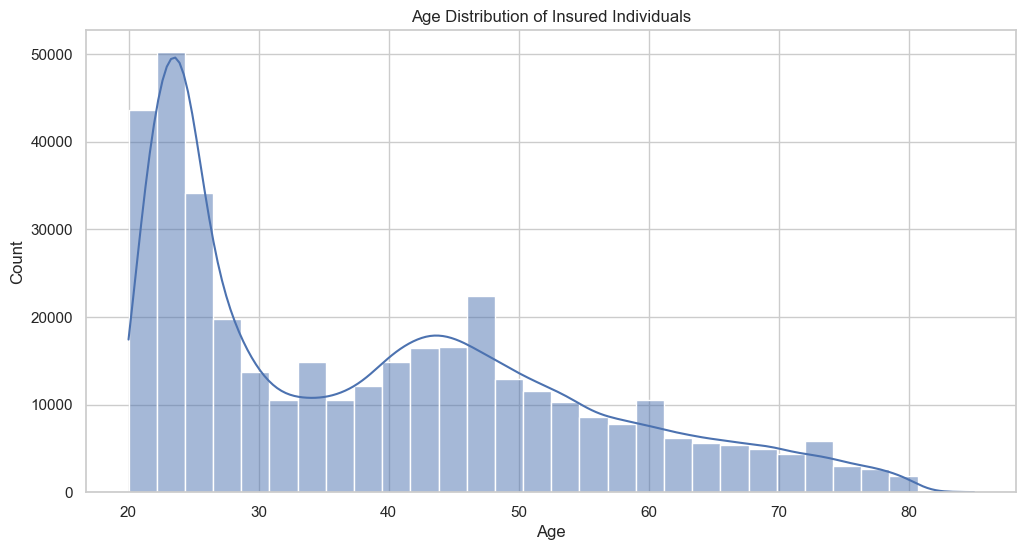

In [9]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution of Insured Individuals")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

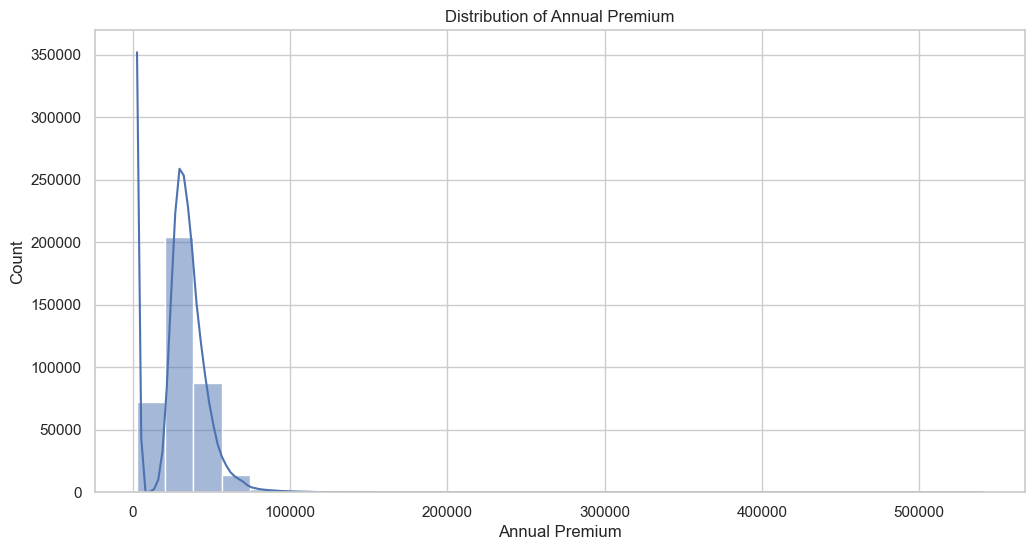

In [10]:
sns.histplot(df['Annual_Premium'].dropna(), bins=30, kde=True)
plt.title("Distribution of Annual Premium")
plt.xlabel("Annual Premium")
plt.ylabel("Count")
plt.show()

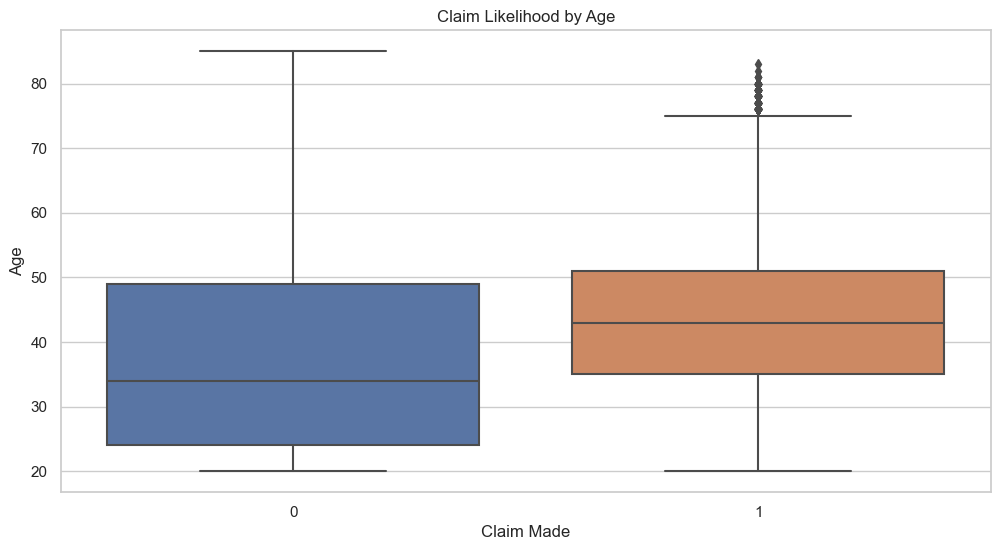

In [11]:
sns.boxplot(x='Response', y='Age', data=df)
plt.title("Claim Likelihood by Age")
plt.xlabel("Claim Made")
plt.ylabel("Age")
plt.show()

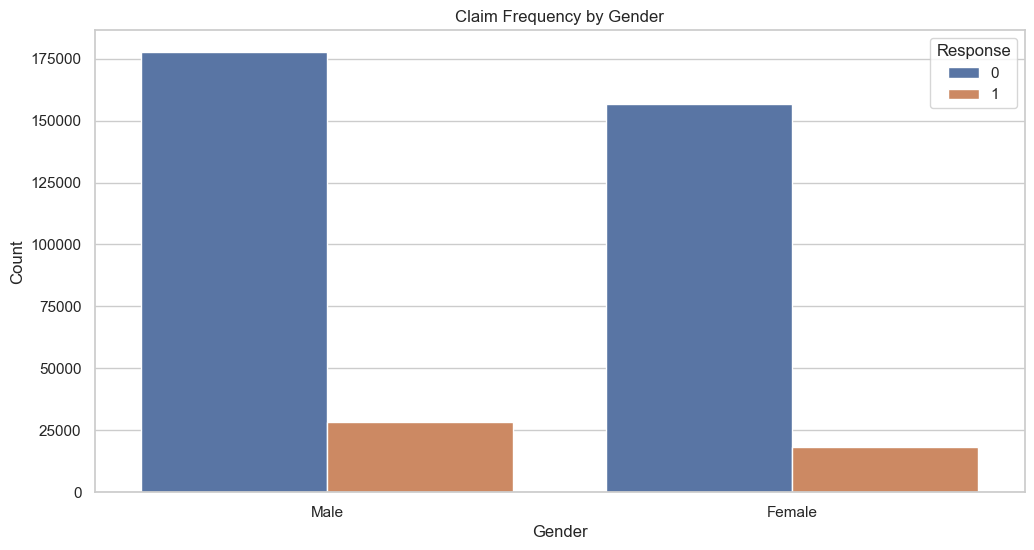

In [12]:
sns.countplot(x='Gender', hue='Response', data=df)
plt.title("Claim Frequency by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

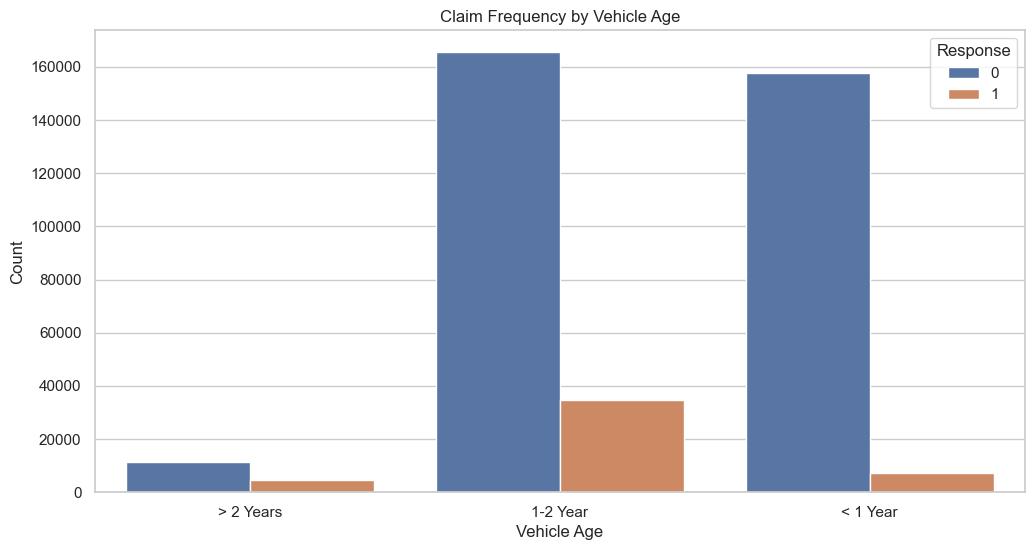

In [13]:
sns.countplot(x='Vehicle_Age', hue='Response', data=df)
plt.title("Claim Frequency by Vehicle Age")
plt.xlabel("Vehicle Age")
plt.ylabel("Count")
plt.show()

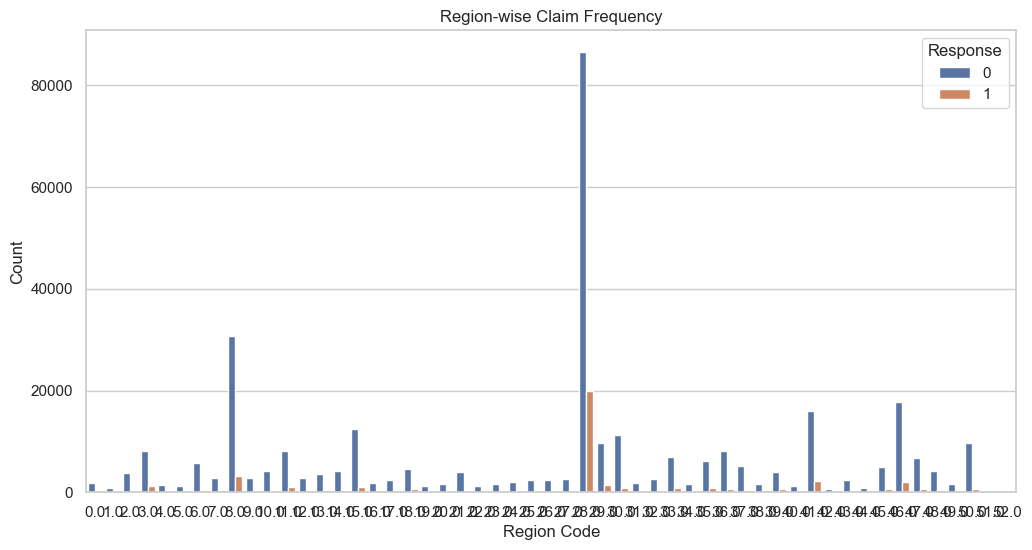

In [14]:
sns.countplot(x='Region_Code', hue='Response', data=df)
plt.title("Region-wise Claim Frequency")
plt.xlabel("Region Code")
plt.ylabel("Count")
plt.show()

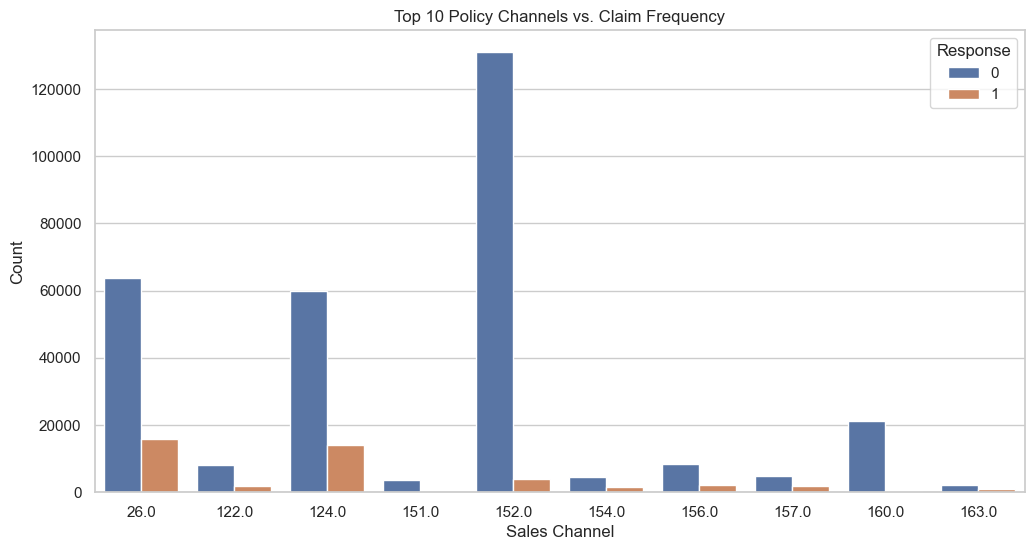

In [16]:
top_channels = df['Policy_Sales_Channel'].value_counts().head(10).index
filtered_df = df[df['Policy_Sales_Channel'].isin(top_channels)]

sns.countplot(x='Policy_Sales_Channel', hue='Response', data=filtered_df)
plt.title("Top 10 Policy Channels vs. Claim Frequency")
plt.xlabel("Sales Channel")
plt.ylabel("Count")
plt.show()

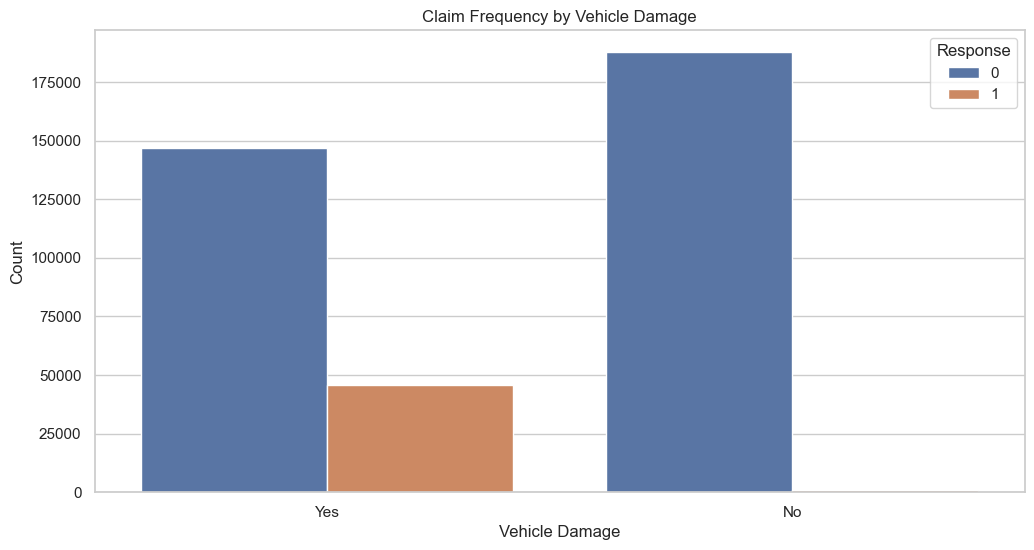

In [17]:
sns.countplot(x='Vehicle_Damage', hue='Response', data=df)
plt.title("Claim Frequency by Vehicle Damage")
plt.xlabel("Vehicle Damage")
plt.ylabel("Count")
plt.show()

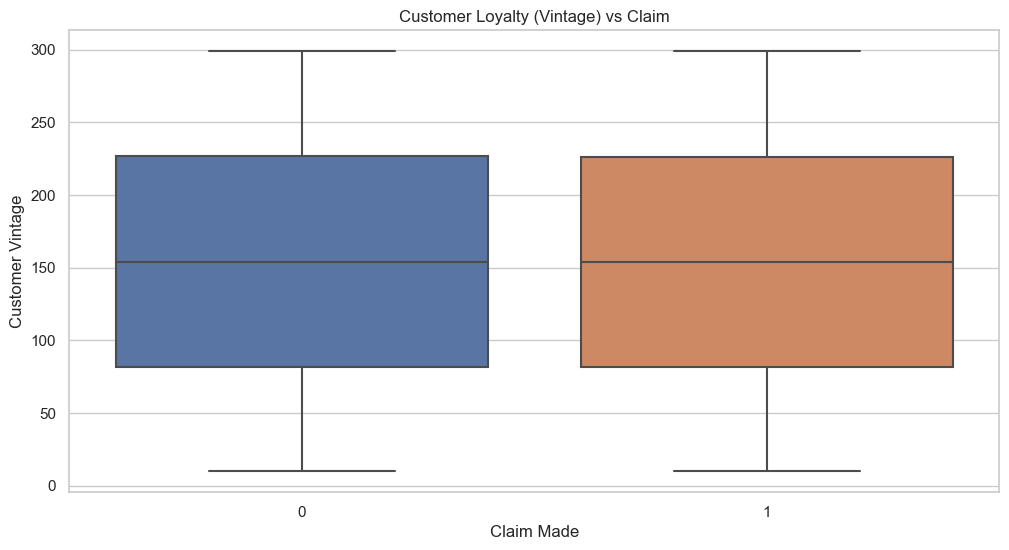

In [18]:
sns.boxplot(x='Response', y='Vintage', data=df)
plt.title("Customer Loyalty (Vintage) vs Claim")
plt.xlabel("Claim Made")
plt.ylabel("Customer Vintage")
plt.show()

In [19]:
print("\n--- Conclusion ---")
print("1. Younger and older age groups show different claim patterns.")
print("2. Annual premium has significant variation across individuals.")
print("3. Vehicle damage history strongly correlates with claim likelihood.")
print("4. Some regions and sales channels show higher claim tendencies.")
print("5. Gender, vehicle age, and customer loyalty are all important factors to analyze claims.")



--- Conclusion ---
1. Younger and older age groups show different claim patterns.
2. Annual premium has significant variation across individuals.
3. Vehicle damage history strongly correlates with claim likelihood.
4. Some regions and sales channels show higher claim tendencies.
5. Gender, vehicle age, and customer loyalty are all important factors to analyze claims.
